Attribute Information:
> 1. age
> 2. sex
> 3. chest pain type (4 values)
> 4. resting blood pressure
> 5. serum cholestoral in mg/dl
> 6. fasting blood sugar > 120 mg/dl
> 7. resting electrocardiographic results (values 0,1,2)
> 8. maximum heart rate achieved
> 9. exercise induced angina
> 10. oldpeak = ST depression induced by exercise relative to rest
> 11. the slope of the peak exercise ST segment
> 12. number of major vessels (0-3) colored by flourosopy
> 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values. One file has been "processed", that one containing the Cleveland database. All four unprocessed files also exist in this directory.

Inspiration
Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

See if you can find any other trends in heart data to predict certain cardiovascular events or find any clear indications of heart health.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge

import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier


from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import OneHotEncoder

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_validate



ModuleNotFoundError: No module named 'sklearn.impute'

In [6]:
heart = pd.read_csv('kaggle/input/heart-disease-uci/heart.csv')

FileNotFoundError: [Errno 2] File b'kaggle/input/heart-disease-uci/heart.csv' does not exist: b'kaggle/input/heart-disease-uci/heart.csv'

In [ ]:
heart.head(10)

In [ ]:
heart.info()

In [ ]:
heart.describe()

In [3]:
heart.hist(figsize=(20,20))

NameError: name 'heart' is not defined

In [4]:
heart.skew()

NameError: name 'heart' is not defined

In [5]:
(np.log1p(heart)).skew()

NameError: name 'heart' is not defined

In [10]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

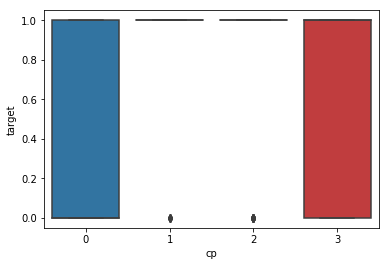

In [11]:
sns.boxplot(x="cp", y ='target', data=heart )

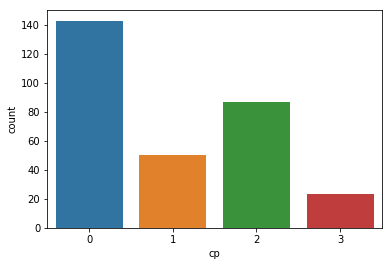

In [12]:
sns.countplot(x="cp", data=heart )

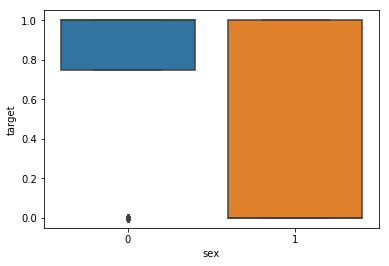

In [13]:
sns.boxplot(data=heart, x='sex',y= 'target')

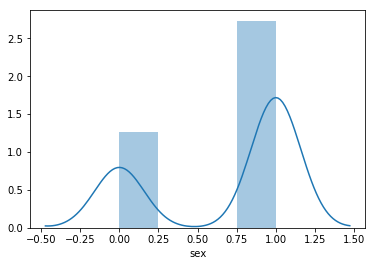

In [14]:
sns.distplot(heart['sex'])

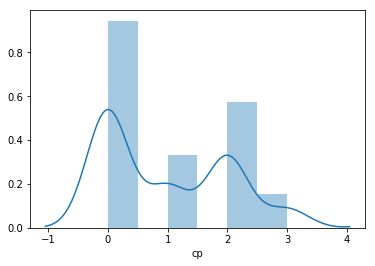

In [15]:
sns.distplot(heart['cp'])

In [16]:
heart.corr()['target']

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
target      1.000000
Name: target, dtype: float64

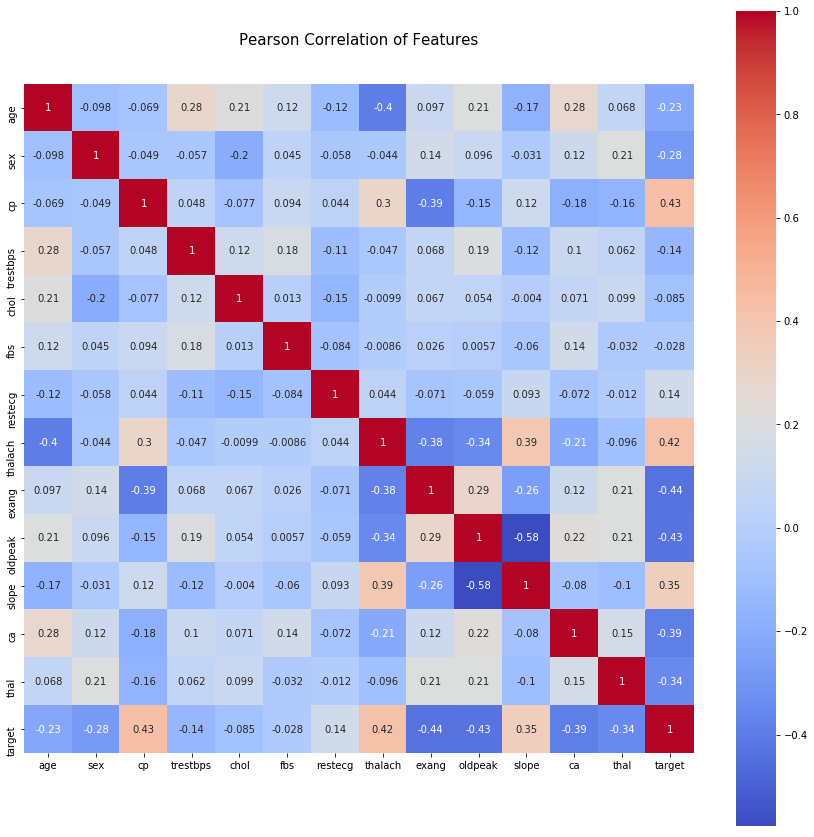

In [17]:
#Correlation Matrix
fig = plt.figure(figsize=[15,15])
plt.title('Pearson Correlation of Features', y=1.05, size=15)

sns.heatmap(heart.corr(), annot = True, square=True,linecolor='white',cmap='coolwarm' )

In [18]:
heart.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [19]:
y = heart['target']


In [20]:
heart.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2,0
177,64,1,2,140,335,0,1,158,0,0.0,2,0,2,0
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
207,60,0,0,150,258,0,0,157,0,2.6,1,2,3,0
62,52,1,3,118,186,0,0,190,0,0.0,1,0,1,1
114,55,1,1,130,262,0,1,155,0,0.0,2,0,2,1
102,63,0,1,140,195,0,1,179,0,0.0,2,2,2,1
151,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1


In [21]:
heart.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [22]:
hea = heart.copy()

In [23]:
hea_dummy = pd.get_dummies(data=hea, columns= ['cp','fbs','restecg','exang','slope','ca','thal'], drop_first=True)

In [24]:
hea_dummy.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,1,145,233,150,2.3,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,1,130,250,187,3.5,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,0,130,204,172,1.4,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,1,120,236,178,0.8,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,0,120,354,163,0.6,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [25]:
hea_dummy.columns

Index(['age', 'sex', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target',
       'cp_1', 'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2', 'exang_1',
       'slope_1', 'slope_2', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

In [26]:
scaler = StandardScaler()
X_new_dummy = scaler.fit_transform(hea_dummy.drop(columns='target'))

In [27]:
selector = SelectFromModel(estimator=RandomForestRegressor(n_jobs=-1, n_estimators=100)).fit(X_new_dummy, y)
X_new_dummy = selector.transform(X_new_dummy)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X_new_dummy, y, test_size=0.2, random_state=42)

In [29]:
model ={'clf':DecisionTreeClassifier(max_depth=3,min_samples_leaf =10, random_state=0),
       'Random Forest Classifier': RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0),
       'Logistic Regression': LogisticRegression(random_state=0),
      'Gaussian Naive': GaussianNB() }

In [30]:
for keys, items in model.items():
   # print(f"key {keys}\n")
   # print( items)
    print(f"cross validation scores: {keys.upper()} ")
    print(cross_val_score(items, X_new_dummy, y, cv=5),"\n")
    

cross validation scores: CLF 
[0.80327869 0.83606557 0.75409836 0.71666667 0.76666667] 

cross validation scores: RANDOM FOREST CLASSIFIER 
[0.80327869 0.7704918  0.75409836 0.73333333 0.83333333] 

cross validation scores: LOGISTIC REGRESSION 
[0.75409836 0.80327869 0.73770492 0.71666667 0.8       ] 

cross validation scores: GAUSSIAN NAIVE 
[0.7704918  0.83606557 0.75409836 0.81666667 0.81666667] 



In [31]:
model ={'clf':DecisionTreeClassifier(max_depth=3,min_samples_leaf =10, random_state=0),
       'Random Forest Classifier': RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0),
       'Logistic Regression': LogisticRegression(random_state=0),
      'Gaussian Naive': GaussianNB() }

for keys, items in model.items():
    cv_results = cross_validate(items, X_new_dummy, y, cv=5, scoring=('r2', 'f1','precision','recall','roc_auc'))
    print("keys" + "  " + str(keys),"\n")
    print("Recall:  ", cv_results['test_recall'])
    print("Precision:  ", cv_results['test_precision'],"\n")
    print("AUC:  ", cv_results['test_roc_auc'])
    print("max AUC:  ", max(cv_results['test_roc_auc']),"\n")
    

keys  clf 

Recall:   [0.81818182 0.87878788 0.6969697  0.81818182 0.81818182]
Precision:   [0.81818182 0.82857143 0.82142857 0.71052632 0.77142857] 

AUC:   [0.83279221 0.86634199 0.83874459 0.75364759 0.81705948]
max AUC:   0.8663419913419913 

keys  Random Forest Classifier 

Recall:   [0.84848485 0.81818182 0.78787879 0.87878788 0.90909091]
Precision:   [0.8        0.77142857 0.76470588 0.70731707 0.81081081] 

AUC:   [0.8538961  0.89935065 0.86038961 0.83838384 0.84960718]
max AUC:   0.8993506493506493 

keys  Logistic Regression 

Recall:   [0.75757576 0.81818182 0.72727273 0.87878788 0.84848485]
Precision:   [0.78125    0.81818182 0.77419355 0.69047619 0.8       ] 

AUC:   [0.83874459 0.91341991 0.82575758 0.83501684 0.85521886]
max AUC:   0.9134199134199135 

keys  Gaussian Naive 

Recall:   [0.78787879 0.84848485 0.72727273 0.84848485 0.84848485]
Precision:   [0.78787879 0.84848485 0.8        0.82352941 0.82352941] 

AUC:   [0.83008658 0.92316017 0.8452381  0.87654321 0.863075